In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import pearsonr

In [4]:
df=pd.read_excel("main_data_for_working.xlsx")
df.drop(columns='Unnamed: 0',inplace=True) #deleting the unnamed column from working data
df


,SA,TPV,MPV,C,H,N,O *,P(Bar),T,CO2
0,645.0,0.26,0.25,70.86,1.71,3.19,14.72,0.15,25,1.43
1,750.0,0.30,0.29,83.88,1.63,3.27,5.30,0.15,25,1.46
2,1259.0,0.52,0.49,87.56,1.06,1.87,9.51,0.15,25,1.36
3,1476.0,0.61,0.60,91.62,0.80,1.67,5.91,0.15,25,1.30
4,1692.0,0.71,0.68,94.51,0.58,1.51,3.40,0.15,25,1.20
...,...,...,...,...,...,...,...,...,...,...
397,1165.0,1.03,0.91,64.70,1.50,10.40,23.25,1.00,0,5.30
398,2693.0,1.68,0.56,84.80,0.50,6.20,8.21,1.00,0,4.70
399,2731.0,1.89,1.12,86.80,1.80,2.60,7.90,1.00,0,4.10
400,2799.0,1.91,1.12,91.90,1.20,1.60,4.45,1.00,0,4.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SA      402 non-null    float64
 1   TPV     402 non-null    float64
 2   MPV     402 non-null    float64
 3   C       402 non-null    float64
 4   H       402 non-null    float64
 5   N       402 non-null    float64
 6   O *     402 non-null    float64
 7   P(Bar)  402 non-null    float64
 8   T       402 non-null    int64  
 9   CO2     402 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 31.5 KB


In [8]:
df.describe()

,SA,TPV,MPV,C,H,N,O *,P(Bar),T,CO2
count,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000
mean,1492.535249,0.766845,0.515224,77.052845,1.719244e+00,3.614527,17.440912,0.902736,18.905473,3.566667
std,705.884298,0.460966,0.271530,11.027192,1.306358e+00,3.201667,9.938368,0.270918,10.747430,1.547911
min,18.000000,0.020000,0.040000,40.400000,-7.105427e-15,0.000000,0.000000,0.150000,0.000000,0.360000
25%,1000.750000,0.450039,0.320000,70.760000,8.925000e-01,1.300000,10.585000,1.000000,25.000000,2.532500
50%,1436.500000,0.660000,0.480000,79.170000,1.550000e+00,2.605000,15.425000,1.000000,25.000000,3.635000
75%,1952.000000,0.967500,0.730000,85.040000,2.390000e+00,5.030000,22.252500,1.000000,25.000000,4.407500
max,3247.000000,3.090000,1.180000,96.960000,1.330000e+01,15.880000,54.000000,1.000000,25.000000,8.200000


In [12]:
corr_mat=df.corr().round(2)
corr_mat

,SA,TPV,MPV,C,H,N,O *,P(Bar),T,CO2
SA,1.00,0.92,0.77,0.20,-0.07,-0.11,-0.17,0.09,-0.10,0.33
TPV,0.92,1.00,0.71,0.13,-0.09,-0.07,-0.11,0.13,-0.14,0.30
MPV,0.77,0.71,1.00,0.11,-0.05,-0.05,-0.10,0.03,-0.08,0.25
C,0.20,0.13,0.11,1.00,-0.35,-0.39,-0.94,-0.08,0.12,-0.05
H,-0.07,-0.09,-0.05,-0.35,1.00,0.08,0.24,0.14,-0.03,0.04
N,-0.11,-0.07,-0.05,-0.39,0.08,1.00,0.11,0.10,-0.06,0.18
O *,-0.17,-0.11,-0.10,-0.94,0.24,0.11,1.00,0.04,-0.11,-0.01
P(Bar),0.09,0.13,0.03,-0.08,0.14,0.10,0.04,1.00,-0.20,0.57
T,-0.10,-0.14,-0.08,0.12,-0.03,-0.06,-0.11,-0.20,1.00,-0.57
CO2,0.33,0.30,0.25,-0.05,0.04,0.18,-0.01,0.57,-0.57,1.00


Text(0.5, 1.0, 'Correlation Strenght')

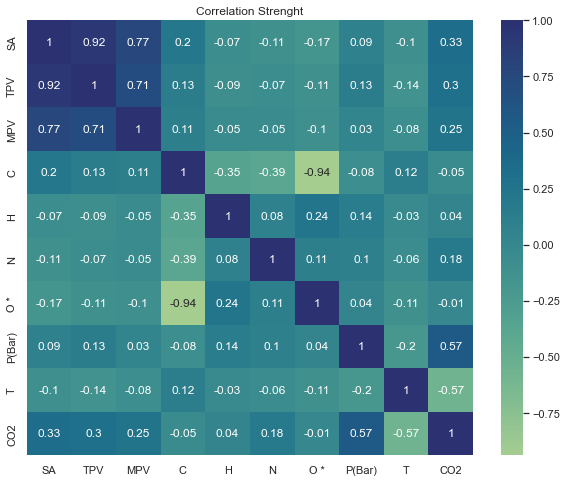

In [27]:
plt.figure(figsize=(10,8))
plot = sns.heatmap(corr_mat,cmap="crest",annot=True)
# sns.color_palette("magma", as_cmap=True)
plot.set_title("Correlation Strenght")